# Feature extraction

In [7]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [8]:
from sklearn.datasets import load_iris

data = load_iris()

X = data['data']
y = data['target']

X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [10]:
data.head(10)

AttributeError: head

## Principal Component Analysis

In the first step we will see how PCA can be used to reduce the dimensionality of the dataset. In PCA it is very important that the features can be meaningfully comparable, so **always perform feature normalization**. In this exercise we will standardize the features.

In [3]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit(X).transform(X)

X_scaled[:5], y[:5]

(array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
        [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
        [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
        [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
        [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]]),
 array([0, 0, 0, 0, 0]))

Firstly, we will reduce the dimensionality of the `Iris` dataset from 4D to 2D.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit(X).transform(X)
X_pca[:5], y[:5]

(array([[-2.68412563,  0.31939725],
        [-2.71414169, -0.17700123],
        [-2.88899057, -0.14494943],
        [-2.74534286, -0.31829898],
        [-2.72871654,  0.32675451]]),
 array([0, 0, 0, 0, 0]))

Let's look at the reduced dataset and the new features (components).

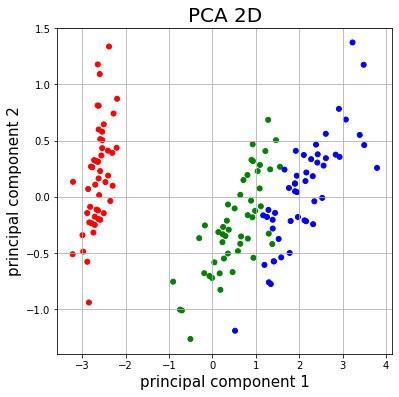

In [5]:
colrs = np.array(['red', 'green', 'blue'])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('PCA 2D', fontsize=20)
ax.set_xlabel('principal component 1', fontsize=15)
ax.set_ylabel('principal component 2', fontsize=15)
ax.grid()

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colrs[y], s=25)

In [6]:
for i,v in enumerate(pca.explained_variance_ratio_):
    print(f'Variance explained by component {i+1}: {v:.4f}')

Variance explained by component 1: 0.9246
Variance explained by component 2: 0.0531


In [ ]:
data.feature_names

In [ ]:
print(pca.components_)

This means that the `principal_component_1` is defined as:

`pca_1 = 0.36 * 'sepal length (cm)' - 0.08 * 'sepal width (cm)' + 0.86 * 'petal length (cm)' + 0.36 * 'petal width (cm)'`

Since the first component explains so much variance in the dataset, maybe we can compress the data even further?

In [ ]:
pca = PCA(n_components=1)

X_pca = pca.fit(X).transform(X)
X_pca[:5], y[:5]

In [ ]:
colrs = np.array(['red', 'green', 'blue'])

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('PCA 1D', fontsize=20)
ax.set_xlabel('principal component 1', fontsize=15)
ax.set_ylim(-1., 1.)
ax.grid()

for c in np.unique(y):
    idx = y == c
    vals = X_pca[idx, 0]
    ax.scatter(vals, np.zeros_like(vals) + np.random.uniform(-0.1,
                                                             0.1, len(vals)), s=25, color=colrs[c])

## Uniform Manifold Approximation and Projection (UMAP)

UMAP is one of the most interesting recent developments in the space of dimensionality reduction/feature extraction algorithms. Understanding its mechanics requires a bit of math, interested students can check the document ["How UMAP works"](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) or delve directly into the [original paper](https://arxiv.org/abs/1802.03426). For us it will be a cool and simple method of projecting high dimensional data onto lower dimensions.

To instlal `umap` please use the following command:

```bash
pip install umap-learn
```

In [ ]:
!pip install numba 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd

In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [ ]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['class'] = data['target']

In [ ]:
df.head()

In [ ]:
sns.pairplot(df, hue='class')

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data['data']
y = data['target']

X_scaled = StandardScaler().fit_transform(X)

In [ ]:
import umap

umap_transformer = umap.UMAP(
    n_neighbors=10,
    n_components=2,
    min_dist=0.2
)

X_umap = umap_transformer.fit_transform(X_scaled)

In [ ]:
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=y).set_title('UMAP projection of Iris dataset')